# Importing Libraries 

In [388]:
# Importing all neccesary libraries
import math # Maths
import pandas as pd # Pandas
import numpy as np # Numpy
import scipy  # A library for scientific computing
import scipy.stats as stats
import matplotlib.pyplot as plt # Matplotlib - for ploting
from matplotlib.ticker import MultipleLocator # Matplotlib - for defining axis spacing
import statsmodels.graphics.tsaplots as tsaplots # Statsmodels - for time series analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf # Statsmodels - for time series analysis

In [389]:
# Importing Data
gdp_df = pd.read_excel("GDP_PC_PPP.xls", header=3, sheet_name="Data")# Importing GDP data for all countries
fert_rate_df = pd.read_csv("fertility_rate.csv") # Importing fertility data
house_price_df = pd.read_excel("Monthly Average House Price.xls") # Importing averate house price for post 91
ftse_df = pd.read_csv("FTSE100.csv") # Importing FTSE data 

# Cleaning ftse Data
ftse_df['Date'] = pd.to_datetime(ftse_df['Date'])
ftse_df = ftse_df.sort_values(by='Date')
house_price_df = house_price_df.rename(columns={'Unnamed: 0' : 'Date'})
house_price_df.set_index('Date', inplace = True)

#gdp_df.head

# Question 1

In [390]:
# Daily energy intake in kJ was measured for 11 women
sample_kJ = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770] # Sample values
mean_kJ = 7725 # Mean VAlue

# Calculating the sample mean, standard deviation, standard error of the mean, t statistic, degrees of freedom and p-value
mean_sample_kJ = np.mean(sample_kJ) # Sample mean
std_sample_kJ = np.std(sample_kJ, ddof = 1) # Sample standard deviaiton
sample_kJ_size = len(sample_kJ) # Sample size
sem_kJ = std_sample_kJ / np.sqrt(sample_kJ_size) # Standarn error of the mean
df_kJ = sample_kJ_size - 1 
t_statistic, p_value = stats.ttest_1samp(sample_kJ, mean_kJ) # 
#print(t_statistic, p_value)

# printing values
print("Sample mean: ", mean_sample_kJ, "\nSample standard deviation: ", std_sample_kJ, "\nStandard error of the mean (SEM): ", sem_kJ, "\nt statistic: ",t_statistic , "\nDegrees of freedom: ", df_kJ, "\np-value: ", p_value )

Sample mean:  6753.636363636364 
Sample standard deviation:  1142.1232221373727 
Standard error of the mean (SEM):  344.3631083801271 
t statistic:  -2.8207540608310193 
Degrees of freedom:  10 
p-value:  0.018137235176105812


# Question 2

In [391]:
# Defining values from both samples
sample_size_IE = 42 # Sample size for Ireland
sample_size_Else = 61 # Sample size for other countries
mean_IE = 74 # Mean for Ireland
mean_Else = 57 # Mean for other countries
std_IE = 7.4 # Standard deviation for Ireland
std_Else = 7.1 # Standard deviation for other countries

# Standard error of the mean
#sem = math.sqrt(((sample_size_IE - 1) * std_IE**2 + (sample_size_Else - 1) * std_Else**2) / (sample_size_IE + sample_size_Else - 2))
#t = ((mean_IE - mean_Else) / (sem * math.sqrt(1/sample_size_IE + 1/sample_size_Else)))

# t-statisitcs, Degrees of freedom, and p-value
t = ((mean_IE - mean_Else) / (math.sqrt(std_IE**2/sample_size_IE + std_Else**2/sample_size_Else))) # t statistic
dof = (std_IE**2/sample_size_IE + std_Else**2/sample_size_Else)**2 / ((std_IE**2/sample_size_IE)**2/(sample_size_IE - 1) + (std_Else**2/sample_size_Else)**2/(sample_size_Else - 1)) # Degrees of freedom
p_value = stats.t.sf(np.abs(t), dof) * 2  # two-sided p-value = Prob(abs(t)>tt)
 
# Printing values in a table
print("t statistic: ", "\np-value: ", p_value)

t statistic:  
p-value:  2.315890162874227e-19


# Question 3

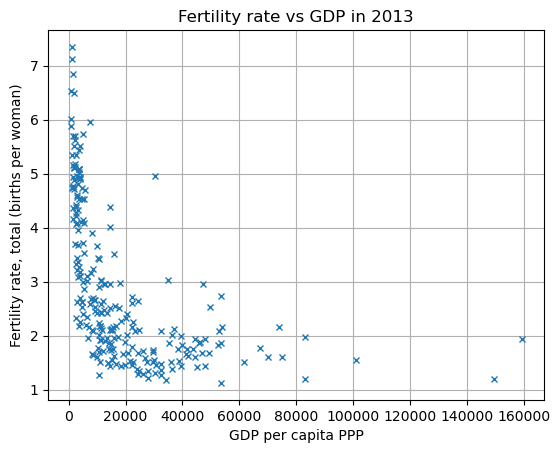

Correlation coefficient:  -0.5171011715863582


In [392]:
# Extracting data for 2013
fert_rate_2013_df = fert_rate_df[["Country Code", "2013"]]
fert_rate_2013_df = fert_rate_2013_df.rename(columns={"2013": 'Fertility Rate 2013'})
gdp_2013_df = gdp_df[["Country Code", "2013"]]
gdp_2013_df = gdp_2013_df.rename(columns={"2013": 'GDP 2013'})

# Merging data
fert_gdp_df = pd.merge(fert_rate_2013_df, gdp_2013_df, on='Country Code', how= "inner")
fert_gdp_df = fert_gdp_df.dropna()

# Plotting fert_gdp data
fig, ax = plt.subplots()  
plt.plot(fert_gdp_df["GDP 2013"], fert_gdp_df["Fertility Rate 2013"], "x", markersize = 4, label = "Fertility rate, total (births per woman)") # PlotS
plt.ylabel('Fertility rate, total (births per woman)') # Y-Axis label
plt.xlabel('GDP per capita PPP') # X-Axis label
plt.title('Fertility rate vs GDP in 2013') # Title
plt.grid(True) # Display grid
plt.show() # Display plot
ax.legend() # Displaying ledgend

# Calculating correlation
fert_gdp_df.dropna(inplace = True) # Droping NaN values
#corr, pv = stats.pearsonr(fert_gdp_df["Fertility Rate 2013"], fert_gdp_df["GDP 2013"])   # Calculate correlation

# fert_gdp_df.head()
fert_gdp_corr = fert_gdp_df["Fertility Rate 2013"].corr(fert_gdp_df["GDP 2013"]) # Calculate correlation
print("Correlation coefficient: ", fert_gdp_corr)
#print(corr) # Print correlation

#fert_gdp_df.head()

# Question 4

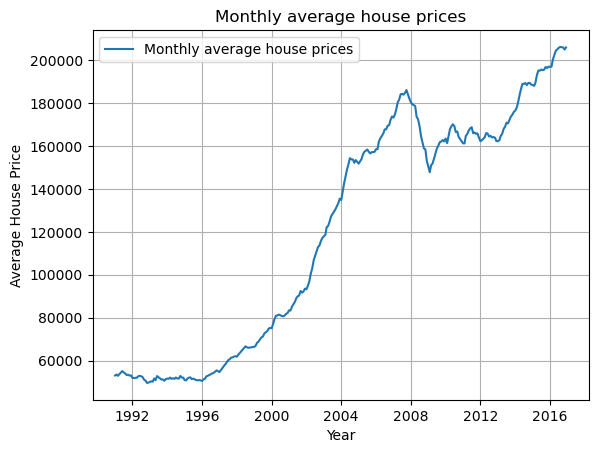

In [393]:
# PART 1

# Extracting data from 1991 to 2016
house_price_df = house_price_df.loc['1991-01-01':'2016-12-31']

fig, ax = plt.subplots() 
plt.plot(house_price_df1['Average House Price'], markersize = 4, label = "Monthly average house prices") # PlotS
#plt.plot(house_price_df1['Unnamed: 0'], house_price_df['Average House Price'], markersize = 4, label = "Monthly average house prices") # PlotS
plt.ylabel('Average House Price') # Y-Axis label
plt.xlabel('Year') # X-Axis label
plt.title('Monthly average house prices') # Title
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend

#house_price_df.head()

Annualised return:  5.35423853535919 %


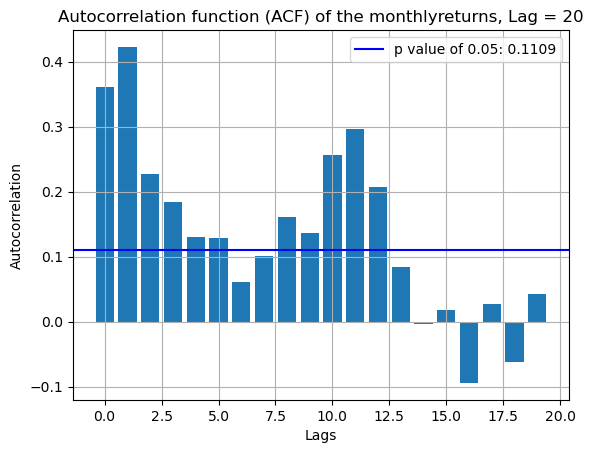

In [394]:
# PART 2

# Calculating monthly returns
house_price_df['Monthly returns'] = (house_price_df['Average House Price'] / house_price_df['Average House Price'].shift(1)) - 1
#house_price_df.head(20)

num_obs = len(house_price_df['Monthly returns'])
critical_val = 1.96/(num_obs**0.5)

# Plotting monthly returns
fig, ax = plt.subplots() 
acf_plot = acf(house_price_df['Monthly returns'].dropna(), nlags = 20)[1:]
plt.bar(range(len(acf_plot)), acf_plot)
plt.axhline(y=critical_val, color='b', label='p value of 0.05: 0.1109') 

plt.ylabel('Autocorrelation') # Y-Axis label
plt.xlabel('Lags') # X-Axis label
plt.title('Autocorrelation function (ACF) of the monthlyreturns, Lag = 20') # Title
plt.grid(True) # Display grid

#plt.axhline(y=-0.05, color='b', label='p value of - 0.05') 
ax.legend() # Displaying ledgend


# Calculating the anuallised return for the house price
house_price_ann_return = (house_price_df['Average House Price'].iloc[-1] / house_price_df['Average House Price'].iloc[0]) ** (1/(2016 - 1991 + 1)) - 1
print("Annualised return: ", house_price_ann_return*100, "%")
#print(critical_val)

# Question 5

In [395]:
house_price_df.head()
ftse_df.head()

#house_price_df = house_price_df.rename(columns={'Unnamed: 0' : 'Date'})
#house_price_df.set_index('Date', inplace = True)
ftse_df.set_index('Date', inplace = True)

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27460\130490122.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftse_norm_df['Cumulative Return Normalized'] = (ftse_norm_df['Cumulative Return']/ftse_init * 100) # Normalising SPY data
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_27460\130490122.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_pnorm_df['Cumulative Return Normalized'] = (house_pnorm_df['Cumulative Return']/housep_init * 100) # Normalising TLT data


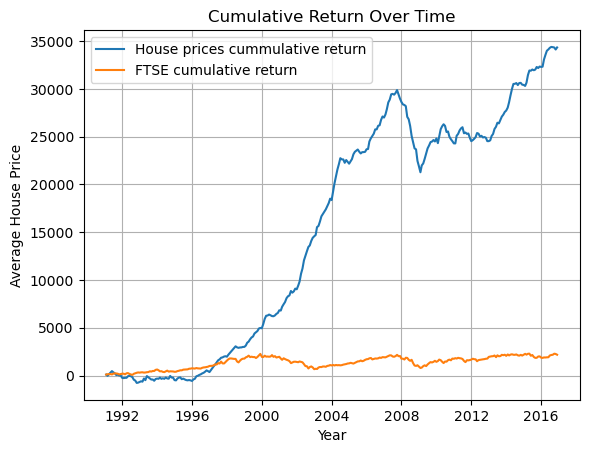

In [396]:
# Gettig the monthly returns for ftse.
ftse_df['Monthly returns'] = (ftse_df['Adj Close'] / ftse_df['Adj Close'].shift(1)) - 1

# Calculating the cumulative return 
ftse_df['Cumulative Return'] = (1 + ftse_df['Monthly returns']).cumprod() - 1
house_price_df['Cumulative Return'] = (1 + house_price_df['Monthly returns']).cumprod() - 1

# Defining the date range
start_date = '1991-01-01'
end_date = '2016-12-31'

# Extract rows within the date range
ftse_norm_df = ftse_df.loc[start_date:end_date]
house_pnorm_df = house_price_df.loc[start_date:end_date]

# Normalising the data and making normalised value begin from $100
ftse_init = ftse_norm_df['Cumulative Return'].iloc[1] # Getting innitial values of spy_df
housep_init = house_pnorm_df['Cumulative Return'].iloc[1] # Getting innitial values of ftse_df

ftse_norm_df['Cumulative Return Normalized'] = (ftse_norm_df['Cumulative Return']/ftse_init * 100) # Normalising SPY data
house_pnorm_df['Cumulative Return Normalized'] = (house_pnorm_df['Cumulative Return']/housep_init * 100) # Normalising TLT data

#ftse_df.head()

fig, ax = plt.subplots() 
plt.plot(house_pnorm_df['Cumulative Return Normalized'], markersize = 4, label = "House prices cummulative return") # PlotS
plt.plot(ftse_norm_df['Cumulative Return Normalized'], markersize = 4, label = "FTSE cumulative return") # PlotS

plt.ylabel('Average House Price') # Y-Axis label
plt.xlabel('Year') # X-Axis label
plt.title('Cumulative Return Over Time') # Title
plt.grid(True) # Display grid
ax.legend() # Displaying ledgend


In [397]:
# Calculating the annualised return for the FTSE
ftse_df.head()
ftse_ann_return = (ftse_df['Close'].iloc[-1] / ftse_df['Close'].iloc[0]) ** (1/(2016 - 1991 + 1)) - 1
print("Annualised return: ", ftse_ann_return*100, "%")


Annualised return:  4.462515478640672 %
